In [151]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Wine example

In [152]:
from lux.lux import LUX
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
wine = datasets.load_wine()

In [153]:
from sklearn.ensemble import RandomForestClassifier

features = [f.replace('/','_') for  f in wine['feature_names']]
target = 'calss'
rs=42
fraction=0.1

#create daatframe with columns names as strings (LUX accepts only DataFrames withj string columns names)
df_wine = pd.DataFrame(wine.data,columns=features)
df_wine[target] = wine.target

#train classifier
train, test = train_test_split(df_wine, random_state=rs)
clf = RandomForestClassifier(random_state=42)#svm.SVC(probability=True, random_state=rs)
clf.fit(train[features],train[target])
clf.score(test[features],test[target])

1.0

## Without predictor uncertainty

In [154]:
#pick some instance from datasetr
i2e = train[features].sample(1, random_state=42).values
i2e

#train lux on neighbourhood equal 30% instances
lux = LUX(predict_proba = lambda x: np.round(clf.predict_proba(x)), neighborhood_size=int(len(train)*fraction),max_depth=2,  node_size_limit = 1, grow_confidence_threshold = 0 )
lux.fit(train[features], train[target], instance_to_explain=i2e,class_names=[0,1,2])

#see the justification of the instance being classified for a given class
lux.justify(np.array(i2e))

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but NearestNeighbors was fitted with feature names
X does not have valid feature names, but NearestNeighbors was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


['IF od280_od315_of_diluted_wines <2.2050000429153442 THEN class = 2 # 0.9285714285714286\n']

In [155]:
#calculate decision tree score over this dataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from lux.pyuid3.data import Data
data = Data.parse_dataframe(test[features+[target]])
    
predictions = [int(x.get_name()) for x in lux.uid3.predict(data.instances)]
print(f'Accuracy : {accuracy_score(predictions, test[target])}')


Accuracy : 0.8222222222222222


In [156]:
# #prind the uncertain local tree for the given instance
# import graphviz
# lux.uid3.tree.save_dot('tree.dot')
# graphviz.Source.from_file('tree.dot')b

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

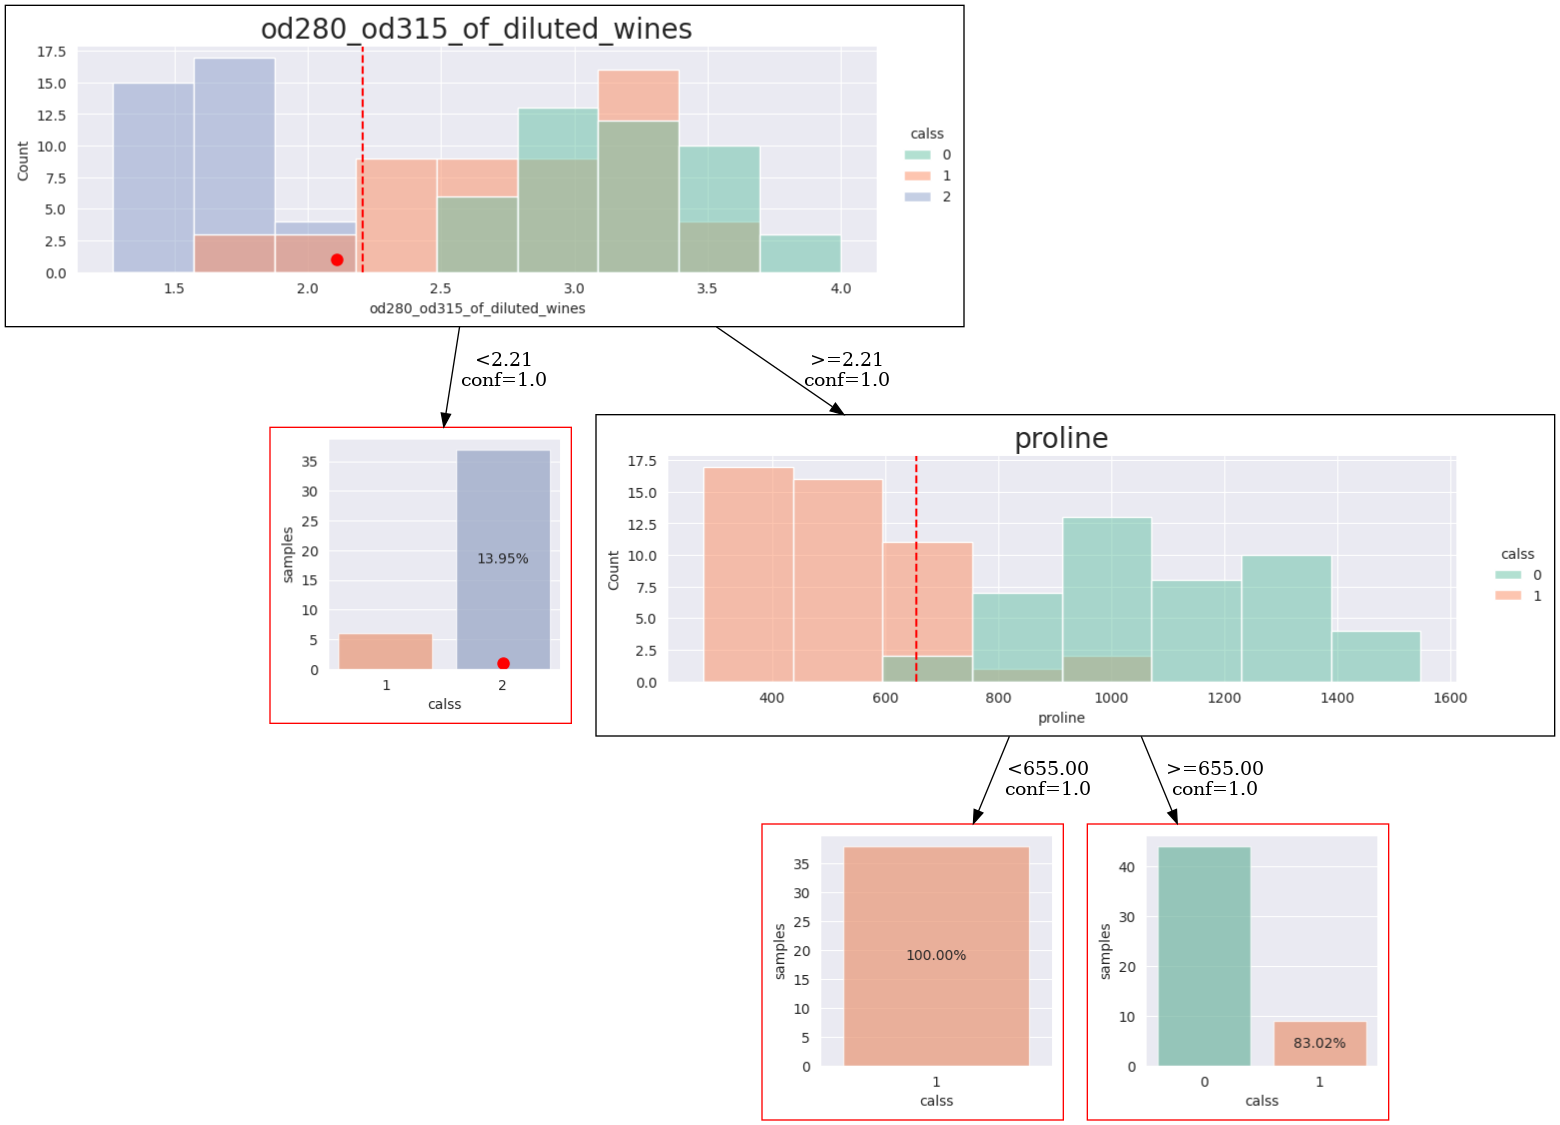

In [157]:
import graphviz
from graphviz import Source
from IPython.display import SVG, Image
i2edf = pd.DataFrame(i2e, columns=features)
i2edf[target] =clf.predict(i2edf.values.reshape(1,-1))[0]
lux.uid3.tree.save_dot('tree-wine.dot',fmt='.2f',visual=True, background_data=train,  instance2explain=i2edf)
gvz=graphviz.Source.from_file('tree-wine.dot')
!dot -Tpng tree-wine.dot > tree-wine.png
Image('tree-wine.png')

## Without SHAP

In [158]:
#pick some instance from datasetr
i2e = train[features].sample(1, random_state=42).values

#train lux on neighbourhood equal 20 instances
lux = LUX(predict_proba = clf.predict_proba, neighborhood_size=int(len(train)*fraction),max_depth=2,  node_size_limit = 1, grow_confidence_threshold = 0 )
lux.fit(train[features], train[target], instance_to_explain=i2e,class_names=[0,1,2])

#see the justification of the instance being classified for a given class
lux.justify(np.array(i2e))

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but NearestNeighbors was fitted with feature names
X does not have valid feature names, but NearestNeighbors was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


['IF od280_od315_of_diluted_wines <2.2050000429153442 AND malic_acid >=1.6249999701976776 THEN class = 2 # 1.0\n']

In [159]:
#calculate decision tree score over this dataset

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from lux.pyuid3.data import Data
data = Data.parse_dataframe(test[features+[target]])
    
predictions = [int(x.get_name()) for x in lux.uid3.predict(data.instances)]
print(f'Accuracy : {accuracy_score(predictions, test[target])}')


Accuracy : 0.8666666666666667


In [160]:
# #prind the uncertain local tree for the given instance
# import graphviz
# lux.uid3.tree.save_dot('tree.dot')
# graphviz.Source.from_file('tree.dot')

In [161]:
plt.figure(figsize=(12,9))
graph=sns.scatterplot(x='od280_od315_of_diluted_wines',y='malic_acid', data=train[['od280_od315_of_diluted_wines','malic_acid',target]],hue=target,s=100)
plt.scatter(data=pd.DataFrame(i2e,columns=features),x='od280_od315_of_diluted_wines',y='malic_acid', marker='o',color='r', s=200)
graph.axhline(2.21)
graph.axvline(1.62)
plt.title('Decision boundary created by LUX for particular instance without SHAP support')
plt.savefig('noshap-wine-scatter.png', format='svg',bbox_inches='tight')

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

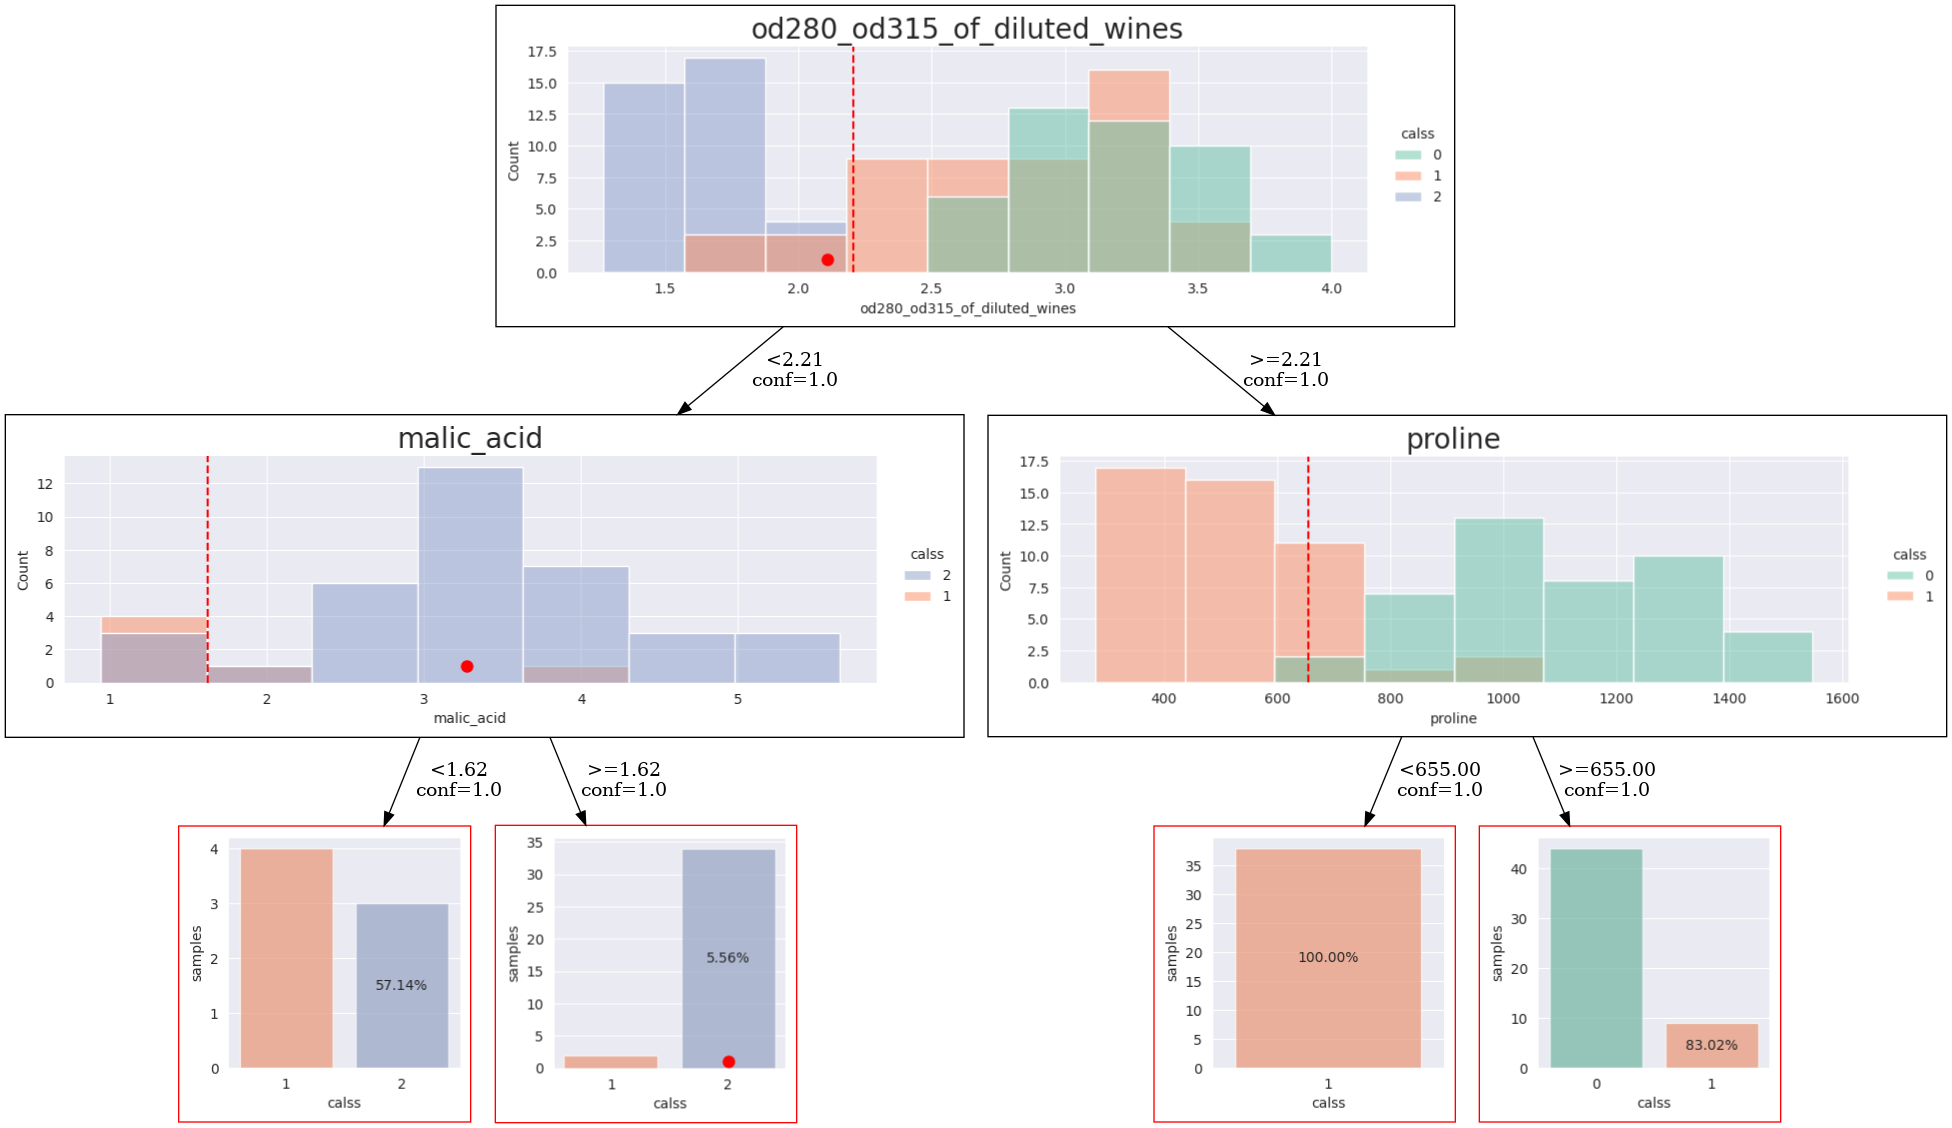

In [162]:
import graphviz
from graphviz import Source
from IPython.display import SVG, Image
i2edf = pd.DataFrame(i2e, columns=features)
i2edf[target] =clf.predict(i2edf.values.reshape(1,-1))[0]
lux.uid3.tree.save_dot('tree-wine.dot',fmt='.2f',visual=True, background_data=train,  instance2explain=i2edf)
gvz=graphviz.Source.from_file('tree-wine.dot')
!dot -Tpng tree-wine.dot > tree-wine.png
Image('tree-wine.png')

## With SHAP

In [163]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(clf, train[features])
shap_values = explainer.shap_values(train[features],check_additivity=False)

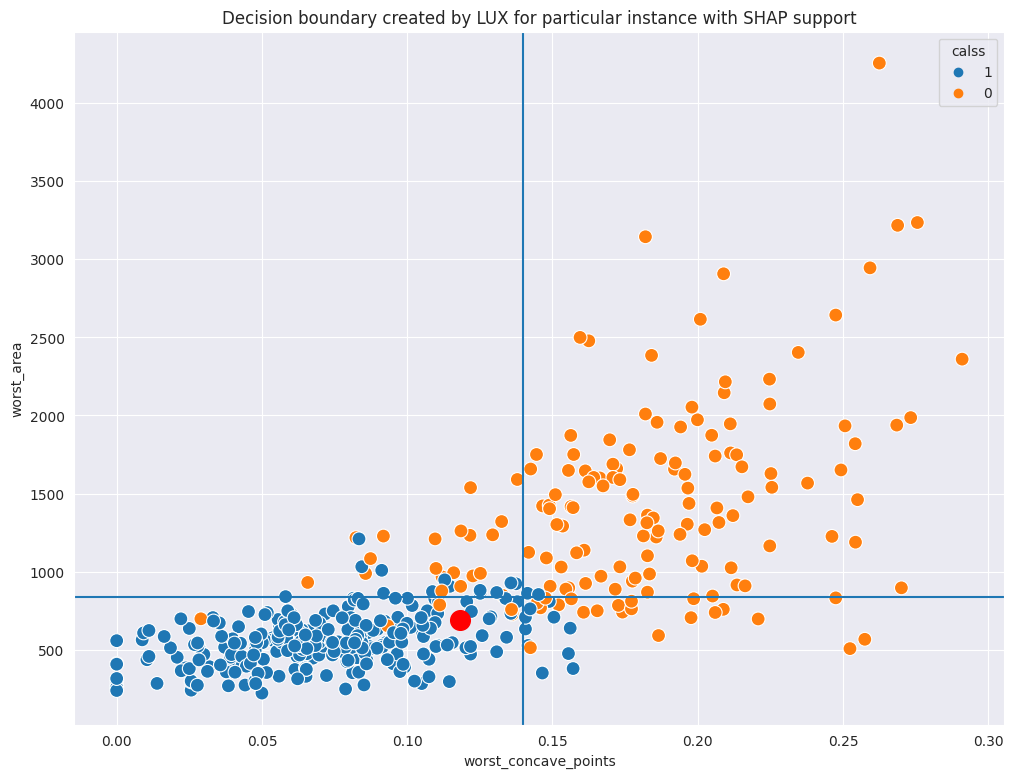

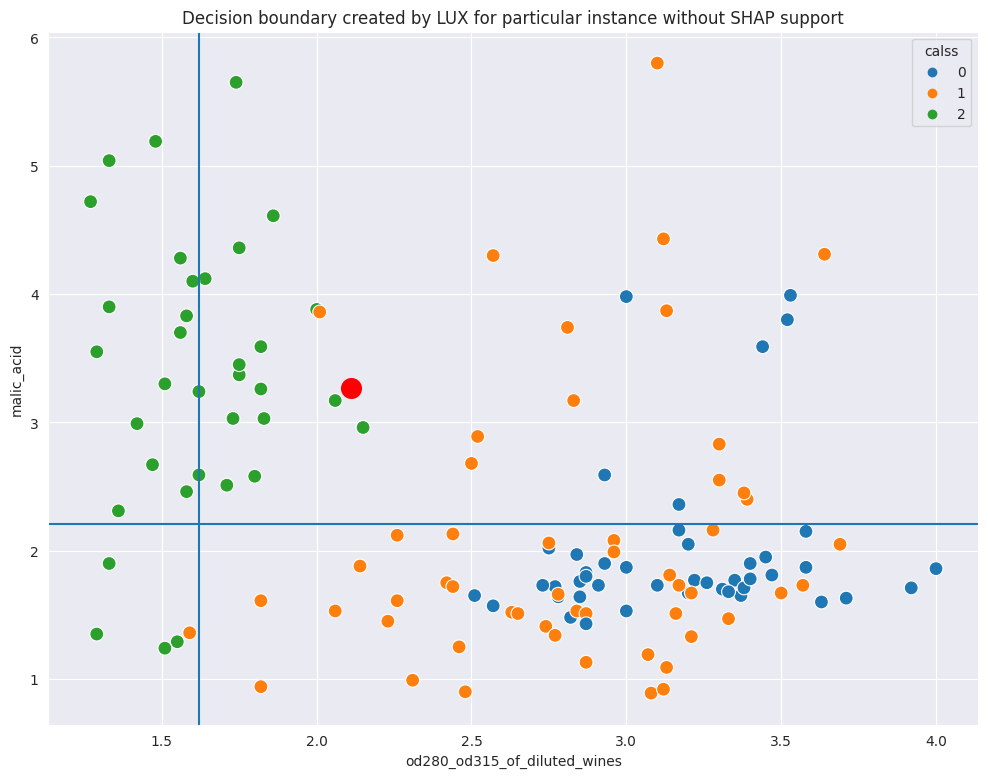

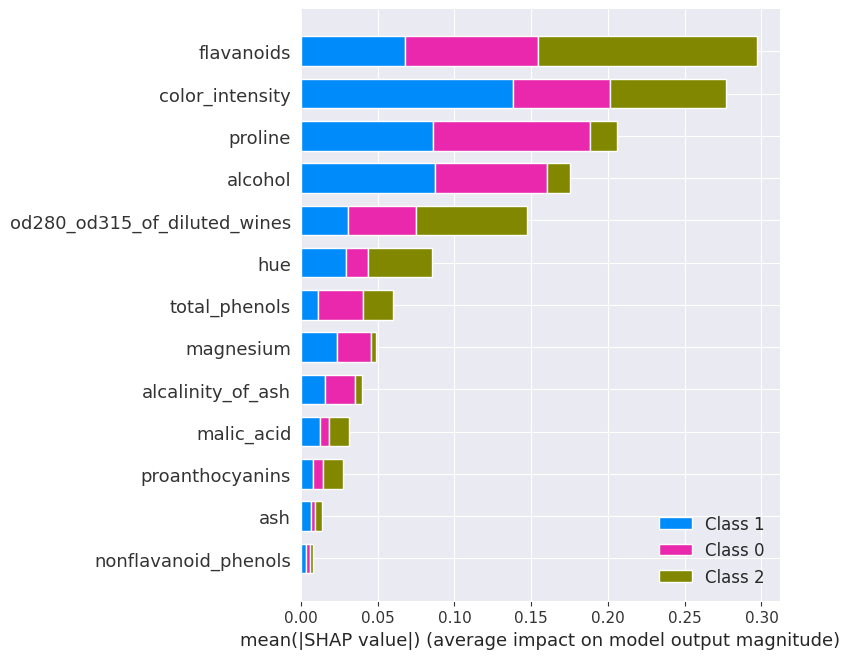

In [164]:
plt.figure()
shap.summary_plot(shap_values, features=None, feature_names=features, max_display=None, show=False)
plt.savefig('shap-wine.png', format='png',bbox_inches='tight')
plt.show()

In [165]:
#train lux on neighbourhood equal 20% instances
lux = LUX(predict_proba = clf.predict_proba, classifier=clf, neighborhood_size=int(len(train)*fraction),max_depth=2,  node_size_limit = 3, grow_confidence_threshold = 0 )
lux.fit(train[features], train[target], X_importances = None,  instance_to_explain=i2e,class_names=[0,1,2],discount_importance=False)

#see the justification of the instance being classified for a given class
lux.justify(np.array(i2e))

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but NearestNeighbors was fitted with feature names
X does not have valid feature names, but NearestNeighbors was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


['IF color_intensity >=3.424999952316284 AND flavanoids <1.4900000095367432 THEN class = 2 # 1.0\n']

In [166]:
#calculate decision tree score over this dataset

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from lux.pyuid3.data import Data
data = Data.parse_dataframe(test[features+[target]])
    
predictions = [int(x.get_name()) for x in lux.uid3.predict(data.instances)]
print(f'Accuracy : {accuracy_score(predictions, test[target])}')


Accuracy : 0.9111111111111111


In [167]:
#prind the uncertain local tree for the given instance
# import graphviz
# lux.uid3.tree.save_dot('tree.dot')
# graphviz.Source.from_file('tree.dot')

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

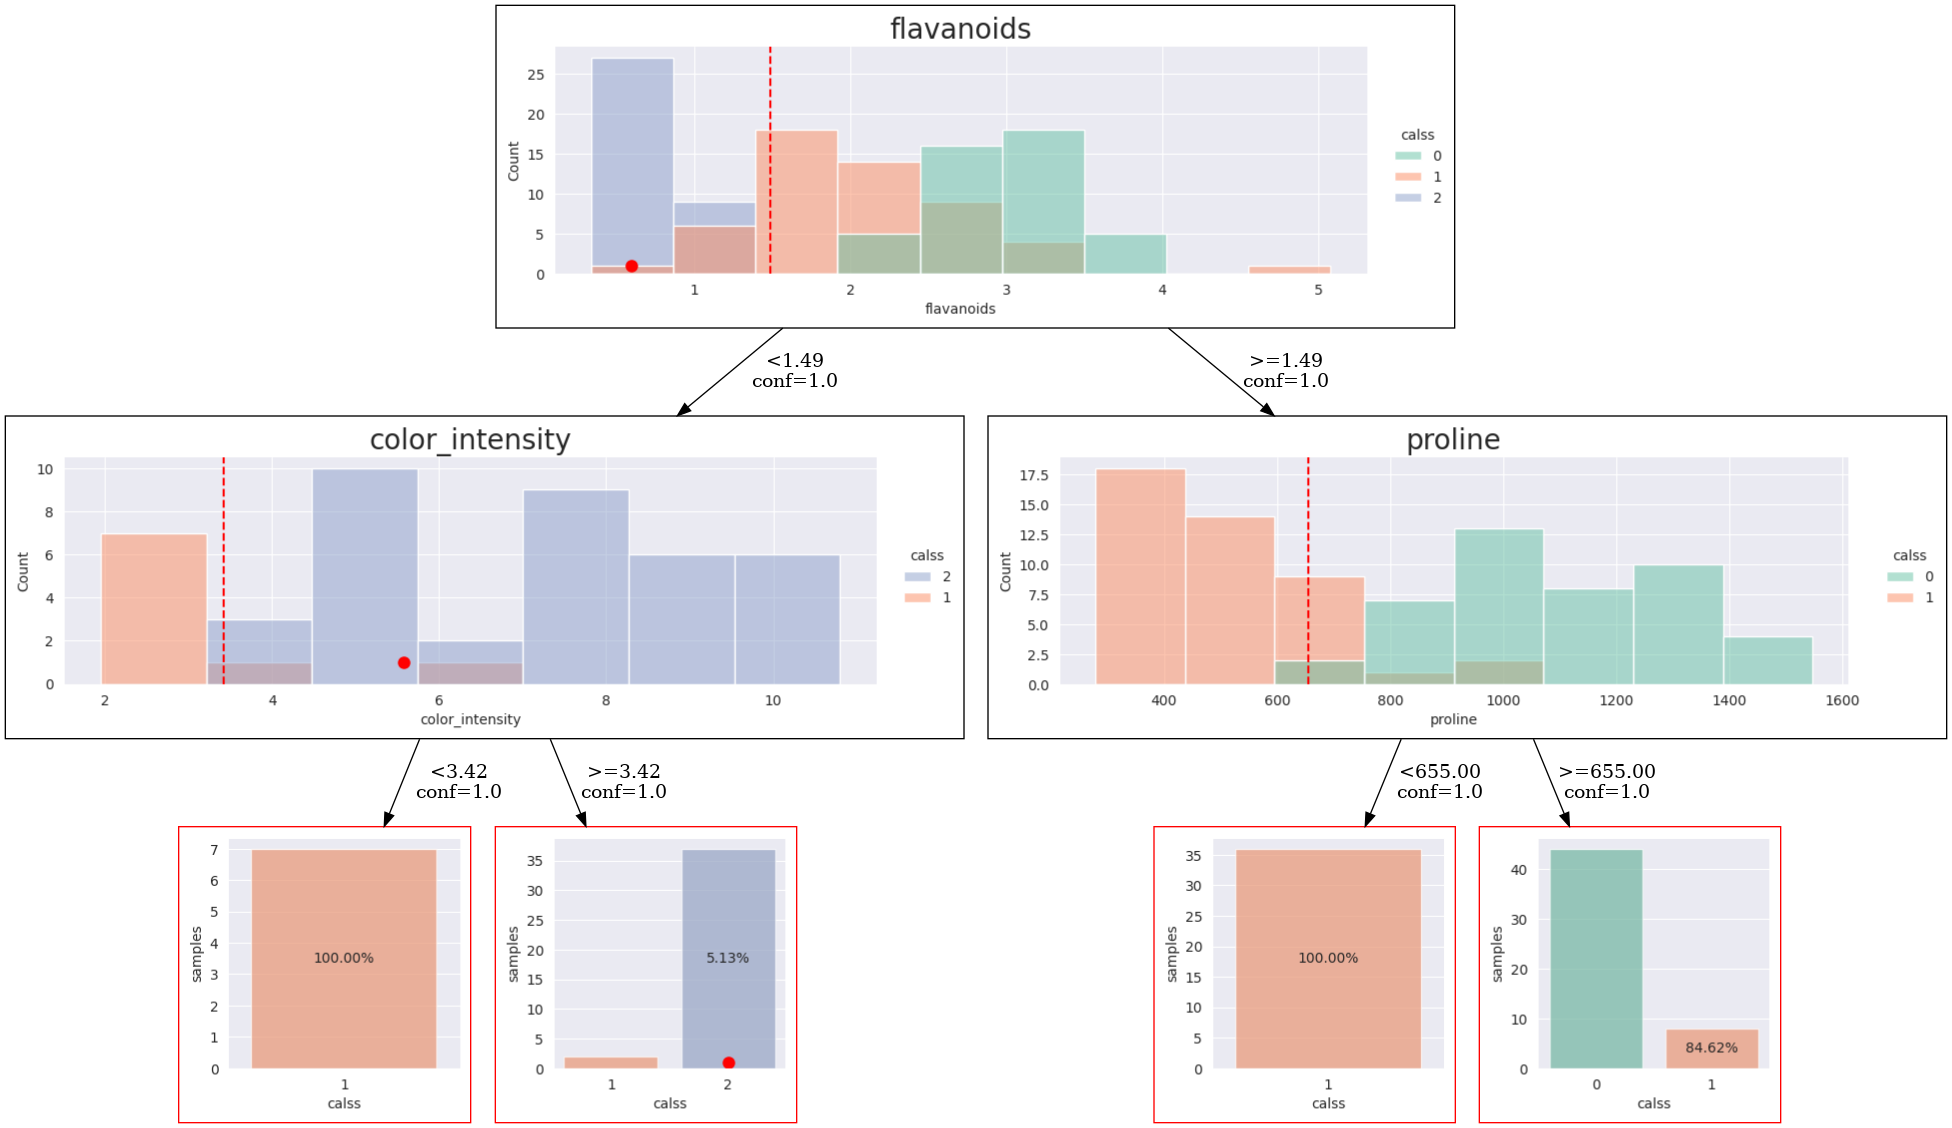

In [168]:
import graphviz
from graphviz import Source
from IPython.display import SVG, Image
i2edf = pd.DataFrame(i2e, columns=features)
i2edf[target] =clf.predict(i2edf.values.reshape(1,-1))[0]
lux.uid3.tree.save_dot('tree-wine-shap.dot',fmt='.2f',visual=True, background_data=train,  instance2explain=i2edf)
gvz=graphviz.Source.from_file('tree-wine-shap.dot')
!dot -Tpng tree-wine-shap.dot > tree-wine-shap.png
Image('tree-wine-shap.png')

In [169]:
plt.figure(figsize=(12,9))
graph=sns.scatterplot(x='flavanoids',y='color_intensity', data=train[['flavanoids','color_intensity',target]],hue=target,s=100)
graph.axvline(1.49)
graph.axhline(3.425)
plt.scatter(data=pd.DataFrame(i2e,columns=features),x='flavanoids',y='color_intensity', marker='o', color='r',s=200)
plt.title('Decision boundary created by LUX for particular instance SHAP support')
plt.savefig('shap-wine-scatter.png', format='png',bbox_inches='tight')

# Breast cancer

In [170]:
from lux.lux import LUX
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
import pandas as pd
# import some data to play with
cancer = datasets.load_breast_cancer()

In [171]:
features = [f.replace(" ","_") for f in cancer['feature_names']]
target = 'calss'
rs=42

#create daatframe with columns names as strings (LUX accepts only DataFrames withj string columns names)
df_cancer = pd.DataFrame(cancer.data,columns=features)
df_cancer[target] = cancer.target

#train classifier
train, test = train_test_split(df_cancer, random_state=rs)
clf = RandomForestClassifier(random_state=42)#svm.SVC(probability=True, random_state=rs)
clf.fit(train[features],train[target])
clf.score(test[features],test[target])

0.965034965034965

## Without predictor uncertinaty

In [172]:
#pick some instance from datasetr
i2e = train[features].sample(1, random_state=42).values

#train lux on neighbourhood equal 30% instances
lux = LUX(predict_proba = lambda x: np.round(clf.predict_proba(x)), neighborhood_size=int(len(train)*fraction),max_depth=2,  node_size_limit = 1, grow_confidence_threshold = 0 )
lux.fit(train[features], train[target], instance_to_explain=i2e,class_names=[0,1])

#see the justification of the instance being classified for a given class
lux.justify(np.array(i2e))

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but NearestNeighbors was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


['IF worst_concave_points <0.1423499956727028 AND worst_radius <16.755000114440918 THEN class = 1 # 0.9076923076923077\n']

In [173]:
#calculate decision tree score over this dataset

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from lux.pyuid3.data import Data
data = Data.parse_dataframe(test[features+[target]])
    
predictions = [int(x.get_name()) for x in lux.uid3.predict(data.instances)]
print(f'Accuracy : {accuracy_score(predictions, test[target])}')


Accuracy : 0.916083916083916


In [174]:
# #prind the uncertain local tree for the given instance
# import graphviz
# lux.uid3.tree.save_dot('tree.dot')
# graphviz.Source.from_file('tree.dot')

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

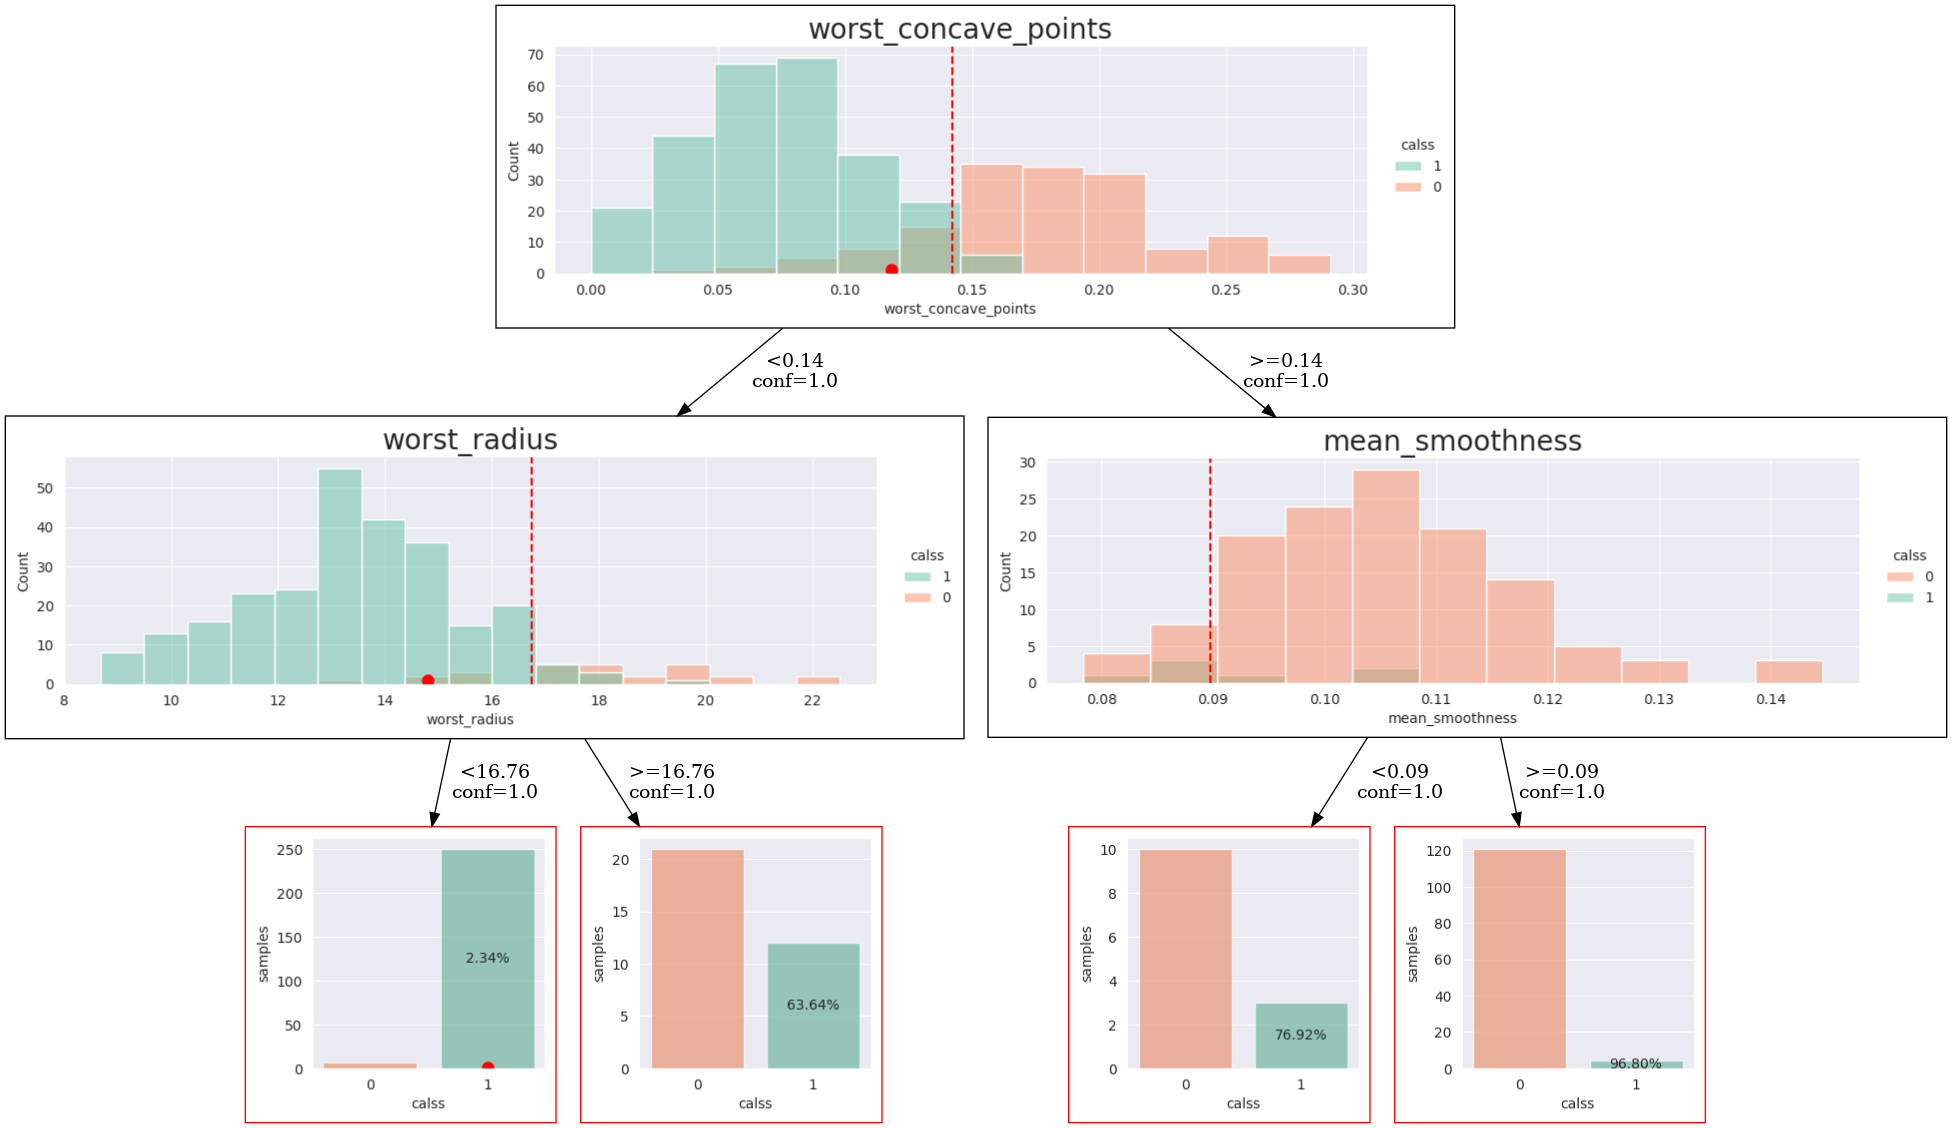

In [175]:
import graphviz
from graphviz import Source
from IPython.display import SVG, Image
i2edf = pd.DataFrame(i2e, columns=features)
i2edf[target] =clf.predict(i2edf.values.reshape(1,-1))[0]
lux.uid3.tree.save_dot('tree-breast.dot',fmt='.2f',visual=True, background_data=train,  instance2explain=i2edf)
gvz=graphviz.Source.from_file('tree-breast.dot')
!dot -Tpng tree-breast.dot > tree-breast.png
Image('tree-breast.png')

## Without SHAP

In [176]:
#pick some instance from datasetr
i2e = train[features].sample(1, random_state=42).values

#train lux on neighbourhood equal 20% instances
lux = LUX(predict_proba = clf.predict_proba, neighborhood_size=int(len(train)*fraction),max_depth=2,  node_size_limit = 1, grow_confidence_threshold = 0 )
lux.fit(train[features], train[target], instance_to_explain=i2e,class_names=[0,1])

#see the justification of the instance being classified for a given class
lux.justify(np.array(i2e))

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but NearestNeighbors was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


['IF worst_concave_points <0.14305000007152557 AND worst_radius <16.755000114440918 THEN class = 1 # 0.9830508474576272\n']

In [177]:
#calculate decision tree score over this dataset

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from lux.pyuid3.data import Data
data = Data.parse_dataframe(test[features+[target]])
    
predictions = [int(x.get_name()) for x in lux.uid3.predict(data.instances)]
print(f'Accuracy : {accuracy_score(predictions, test[target])}')


Accuracy : 0.9230769230769231


In [178]:
# #prind the uncertain local tree for the given instance
# import graphviz
# lux.uid3.tree.save_dot('tree.dot')
# graphviz.Source.from_file('tree.dot')

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

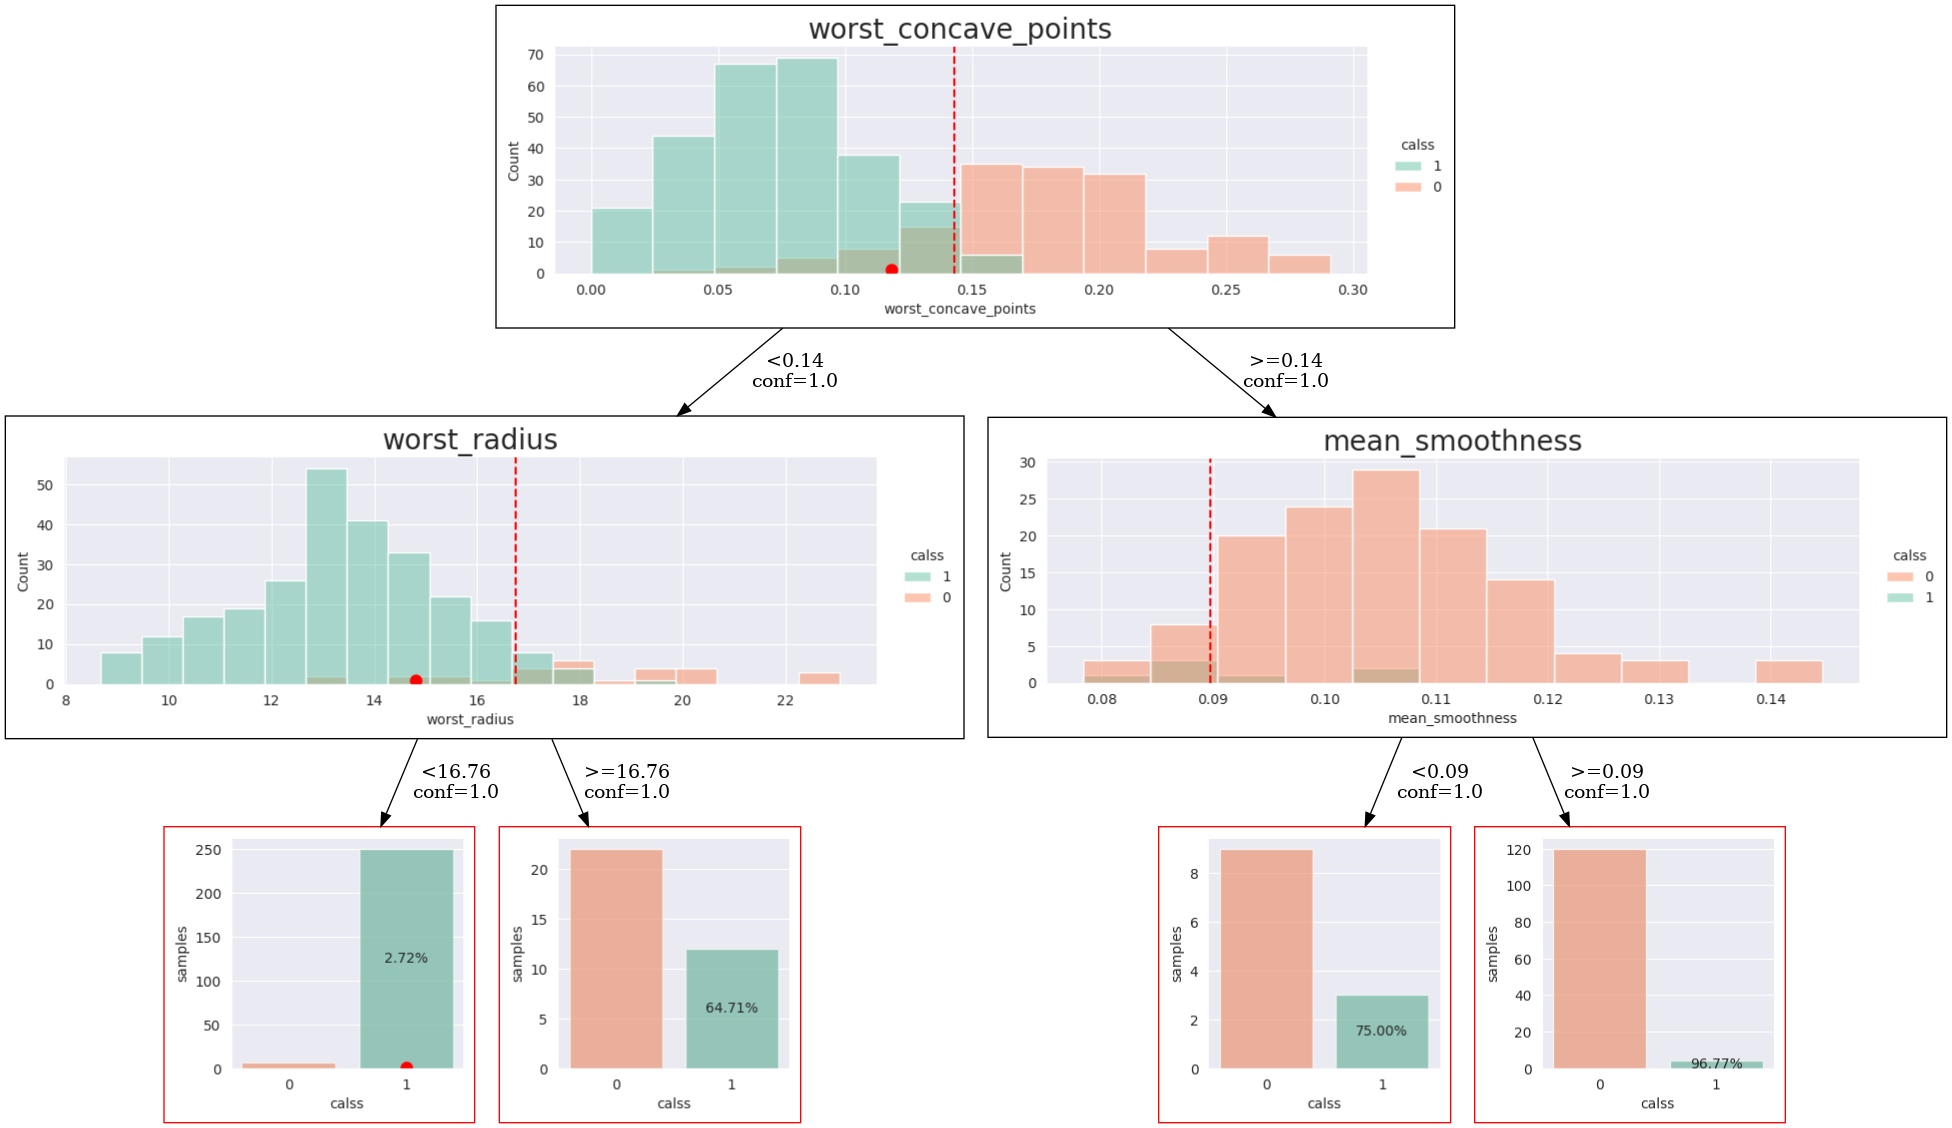

In [179]:
import graphviz
from graphviz import Source
from IPython.display import SVG, Image
i2edf = pd.DataFrame(i2e, columns=features)
i2edf[target] =clf.predict(i2edf.values.reshape(1,-1))[0]
lux.uid3.tree.save_dot('tree-breast.dot',fmt='.2f',visual=True, background_data=train,  instance2explain=i2edf)
gvz=graphviz.Source.from_file('tree-breast.dot')
!dot -Tpng tree-breast.dot > tree-breast.png
Image('tree-breast.png')

In [180]:
plt.figure(figsize=(12,9))
graph=sns.scatterplot(x='worst_concave_points',y='worst_radius', data=train[['worst_concave_points','worst_radius',target]],hue=target,s=100)
graph.axvline(0.14)
graph.axhline(16.76)
plt.scatter(data=pd.DataFrame(i2e,columns=features),x='worst_concave_points',y='worst_radius', marker='o',color='r', s=200)
plt.title('Decision boundary created by LUX for particular instance without SHAP support')

Text(0.5, 1.0, 'Decision boundary created by LUX for particular instance without SHAP support')

## With SHAP
You will see that the result is almost the same, but now the explainer uses the same set of features as blackbox model, minimizing the Rashomon effect

In [181]:
import shap
shap.initjs()
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees


explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(train[features],check_additivity=True)

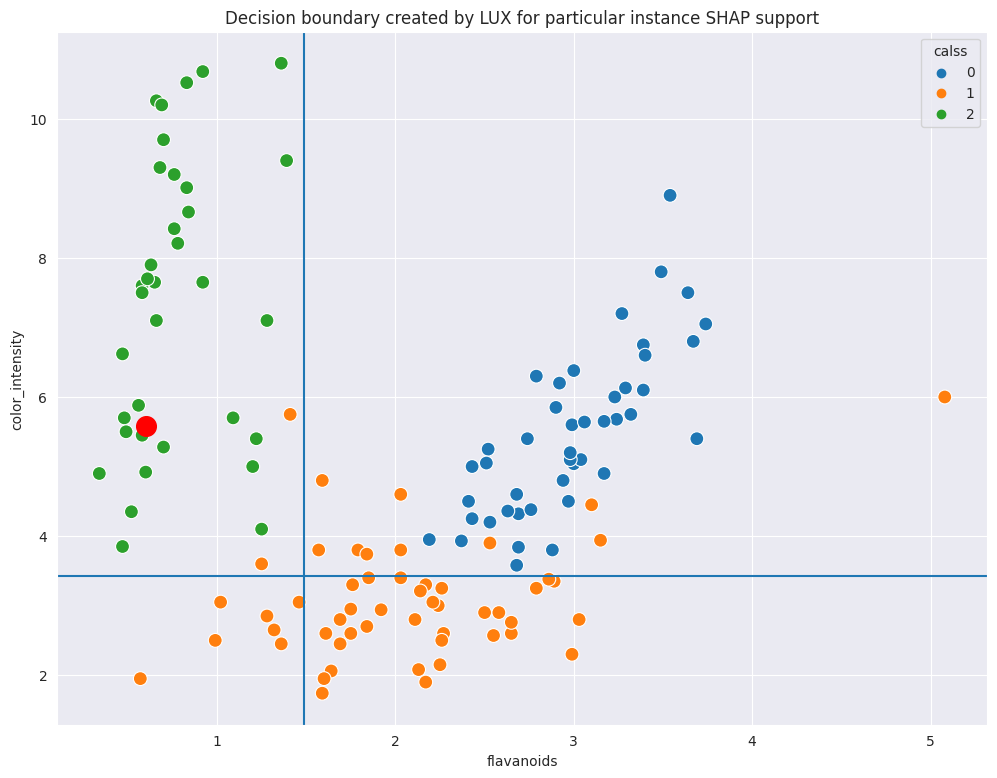

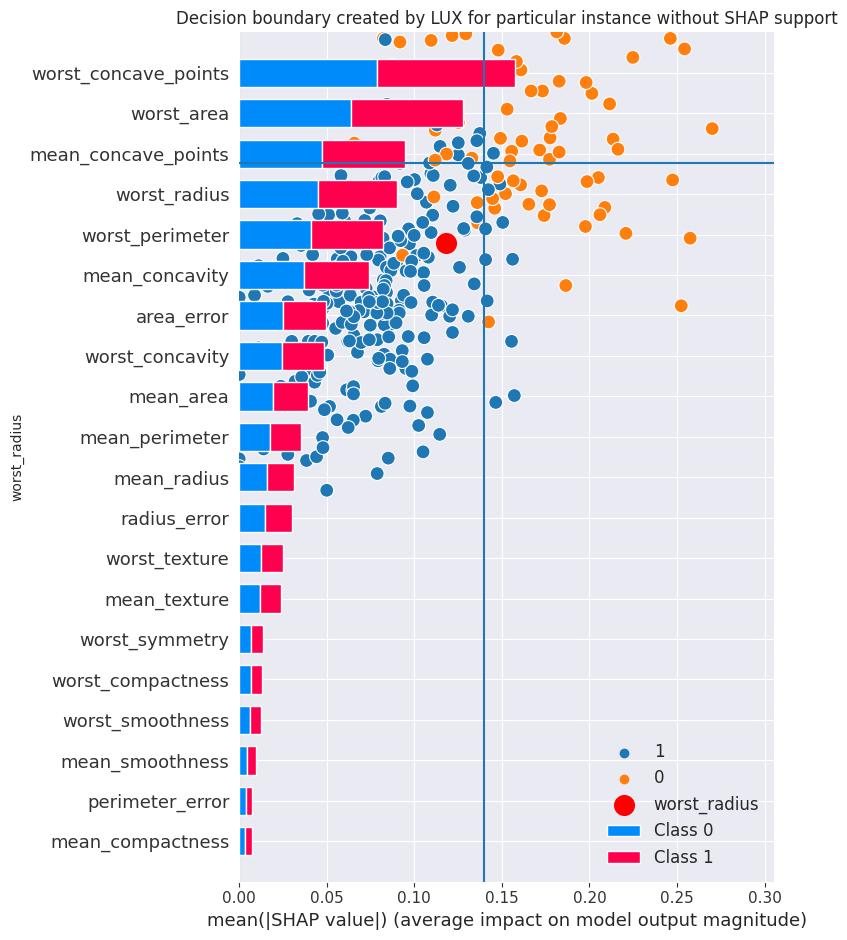

In [182]:
shap.summary_plot(shap_values,train[features])#, features=None, feature_names=features, max_display=None)

In [183]:
#train lux on neighbourhood equal 20% instances
lux = LUX(predict_proba = clf.predict_proba, classifier=clf, neighborhood_size=int(len(train)*fraction),max_depth=2,  node_size_limit = 3, grow_confidence_threshold = 0 )
lux.fit(train[features], train[target], X_importances = None,  instance_to_explain=i2e,class_names=[0,1],discount_importance=False)

#see the justification of the instance being classified for a given class
lux.justify(np.array(i2e))

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but NearestNeighbors was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


['IF worst_area <839.6499938964844 AND worst_concave_points <0.14305000007152557 THEN class = 1 # 0.9827586206896551\n']

In [184]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from lux.pyuid3.data import Data
data = Data.parse_dataframe(test[features+[target]])
    
predictions = [int(x.get_name()) for x in lux.uid3.predict(data.instances)]
print(f'Accuracy : {accuracy_score(predictions, test[target])}')


Accuracy : 0.9370629370629371


In [185]:
# #prind the uncertain local tree for the given instance
# import graphviz
# lux.uid3.tree.save_dot('tree.dot')
# graphviz.Source.from_file('tree.dot')

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

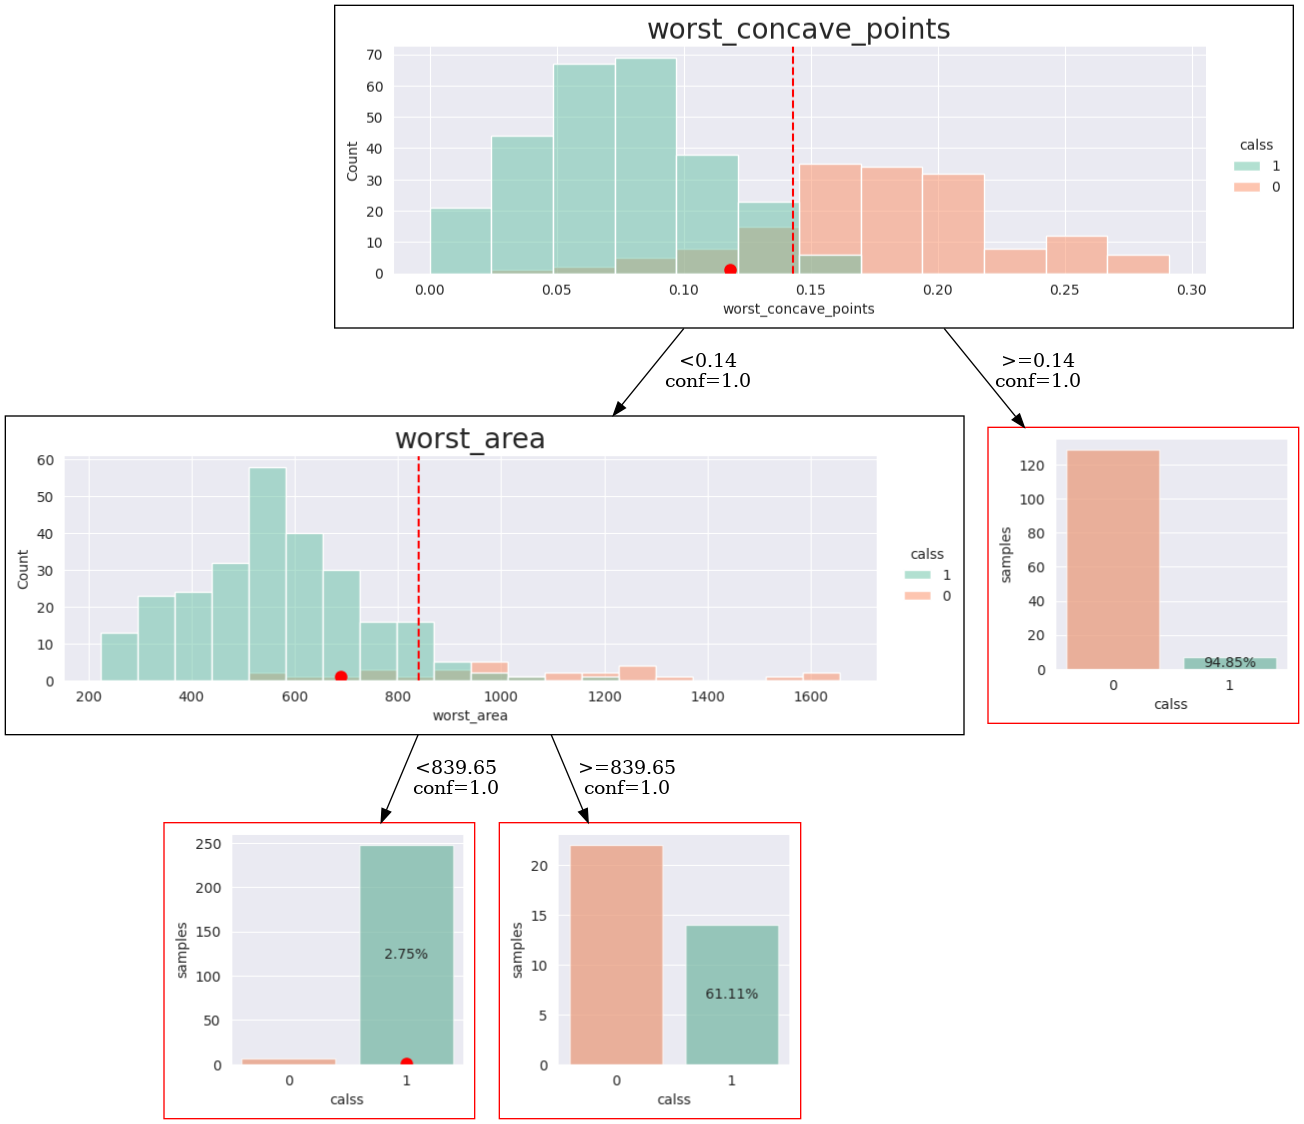

In [186]:
import graphviz
from graphviz import Source
from IPython.display import SVG, Image
i2edf = pd.DataFrame(i2e, columns=features)
i2edf[target] =clf.predict(i2edf.values.reshape(1,-1))[0]
lux.uid3.tree.save_dot('tree-breast-shap.dot',fmt='.2f',visual=True, background_data=train,  instance2explain=i2edf)
gvz=graphviz.Source.from_file('tree-breast-shap.dot')
!dot -Tpng tree-breast-shap.dot > tree-breast-shap.png
Image('tree-breast-shap.png')

In [187]:
plt.figure(figsize=(12,9))
graph=sns.scatterplot(x='worst_concave_points',y='worst_area', data=train[['worst_concave_points','worst_area',target]],hue=target,s=100)
graph.axvline(0.14)
graph.axhline(839.7)
plt.scatter(data=pd.DataFrame(i2e,columns=features),x='worst_concave_points',y='worst_area', marker='o',color='r', s=200)
plt.title('Decision boundary created by LUX for particular instance with SHAP support')

Text(0.5, 1.0, 'Decision boundary created by LUX for particular instance with SHAP support')